<a href="https://colab.research.google.com/github/hojeong0328/git_test1/blob/main/%EC%B0%BD%EA%B3%B5%EC%84%A4_%EA%B8%B0%EB%A7%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
import keras
import cv2
import PIL
import os
import matplotlib.pyplot as plt
import random

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

from PIL import Image, ImageOps
from google.colab import files

In [ ]:
# 흰색 배경, 검정색 글자 -> pillow로 처리

##### 0. Test 사진 불러오기

In [19]:
uploaded = files.upload()

Saving test0.png to test0.png
Saving test1.png to test1.png
Saving test2.png to test2.png
Saving test3.png to test3.png
Saving test4.png to test4.png
Saving test5.png to test5.png
Saving test6.png to test6.png
Saving test7.png to test7.png
Saving test8.png to test8.png
Saving test9.png to test9.png


##### 1. 숫자 데이터 가져오기

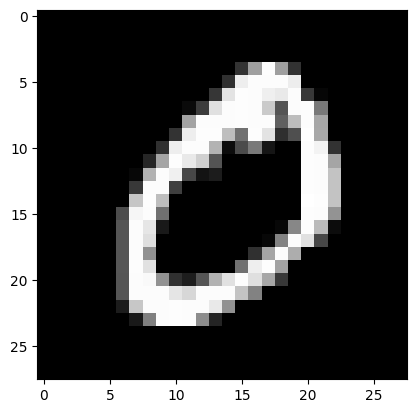

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
# + x_train...numpy형식

plt.imshow(x_train[1], cmap="gray")


In [3]:
# X_train_mixed = []
# # (테스트를 위해 2만 개만 생성. 전체를 하시려면 x_train을 사용하세요)
# data_to_process = x_train

# print("데이터셋 랜덤 반전 시작...")

# for image in data_to_process:
#     # 50%의 확률로 이미지를 반전시킴
#     if random.random() < 0.5:
#         # --- 흰 배경, 검정 글씨로 반전 ---
#         pil_img = Image.fromarray(image.astype(np.uint8))
#         inverted_pil_img = ImageOps.invert(pil_img)
#         inverted_image = np.array(inverted_pil_img)
#         X_train_mixed.append(inverted_image)
#     else:
#         # --- 원본(검정 배경) 그대로 추가 ---
#         X_train_mixed.append(image)

# # 리스트를 다시 numpy 배열로 변환
# X_train_mixed = np.array(X_train_mixed)

# print("랜덤하게 섞인 데이터셋 생성 완료!")

# # --- 3. 결과 확인 (샘플 10개 출력) ---
# plt.figure(figsize=(10, 4))
# for i in range(10):
#     plt.subplot(2, 5, i + 1)
#     plt.imshow(X_train_mixed[i], cmap='gray')
#     plt.title(f"Label: {y_train[i]}")
#     plt.axis('off')
# plt.suptitle("랜덤하게 섞인 숫자 데이터셋 (결과 샘플)")
# plt.show()

##### 1.5. 색 반전 데이터 추가

In [4]:
# 0: 검정, 255: 흰색
# -> 픽셀 값의 평균이 기준값(절반)보다 크면 흰배경/검은 글씨일 확률이 높음

X_train_processed = [] #X_train_processed는 리스트

THRESHOLD = 127 #255 절반

for image in x_train:

    # 흰배경/검은 글씨일 경우
    if np.mean(image) > THRESHOLD: #np.mean(이미지): 이미지 픽셀 평균값 계산

        pil_img = Image.fromarray(image.astype(np.uint8)) #numpy->PIL 변환(imageOps 사용 위해)

        inverted_pil_img = ImageOps.invert(pil_img) # 색상 반전

        inverted_image = np.array(inverted_pil_img) # PIL->numpy 변환(이미지 저장 위해)

        X_train_processed.append(inverted_image) # numpy이미지 저장
    else:
        # 정상 이미지(검은 배경)는 그대로 추가
        X_train_processed.append(image)

x_train = np.array(X_train_processed) #리스트->numpy 변환 후 x_train 저장, -> x_train에는 색 보정된 데이터로 업뎃

#테스트셋도 종일하게 진행
X_test_processed = []
for image in x_test:
    if np.mean(image) > THRESHOLD:
        pil_img = Image.fromarray(image.astype(np.uint8))
        inverted_pil_img = ImageOps.invert(pil_img)
        inverted_image = np.array(inverted_pil_img)
        X_test_processed.append(inverted_image)
    else:
        X_test_processed.append(image)

x_test = np.array(X_test_processed)

##### 2. 데이터 전처리_숫자 데이터셋 X,Y의 형태 바꾸기

In [5]:
#28 * 28 -> 1 * 784 변환
X_train = x_train.reshape(60000, 784)
X_test = x_test.reshape(10000, 784)
#실수형 변환
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# 0~1 값으로 정규화
X_train/= 255
X_test/= 255
print("X train matrix shape", X_train.shape)
print("X test matrix shape", X_test.shape)
# one-hot incoding, (ex.7 -> (0,0,0,0,0,0,1,0,0)로 변환)
Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)
print("Y_train matrix shape", Y_train.shape)
print("Y_test matrix shape", Y_test.shape)

X train matrix shape (60000, 784)
X test matrix shape (10000, 784)
Y_train matrix shape (60000, 10)
Y_test matrix shape (10000, 10)


##### 3. 모델 구축하기

In [6]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))

model.add(Activation('relu'))
model.add(Dense(256))

model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,570 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 535,818 (2.04 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

##### 4. 모델 학습시키기

In [7]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=128, epochs=10, verbose=1)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.8771 - loss: 0.4177
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.9727 - loss: 0.0871
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9844 - loss: 0.0500
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9903 - loss: 0.0323
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9926 - loss: 0.0228
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9934 - loss: 0.0211
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9946 - loss: 0.0171
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9954 - loss: 0.0135
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9960 - loss: 0.0118
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9959 - loss: 0.0123


##### 5. 모델 정확도 살펴보기

In [11]:
score = model.evaluate(X_test, Y_test)
print('Test score', score[0])
print('Test accuracy', score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9766 - loss: 0.0947
Test score 0.07997283339500427
Test accuracy 0.9811999797821045


##### 6. 학습 결과 확인하기

In [8]:
predicted_class = np.argmax(model.predict(X_test), axis = 1)
correct_indices = np.nonzero(predicted_class == y_test)[0]
print(len(correct_indices))
incorrect_indices = np.nonzero(predicted_class != y_test)[0]
print(len(incorrect_indices))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
9812
188


##### 7. 잘 예측된 데이터 살펴보기

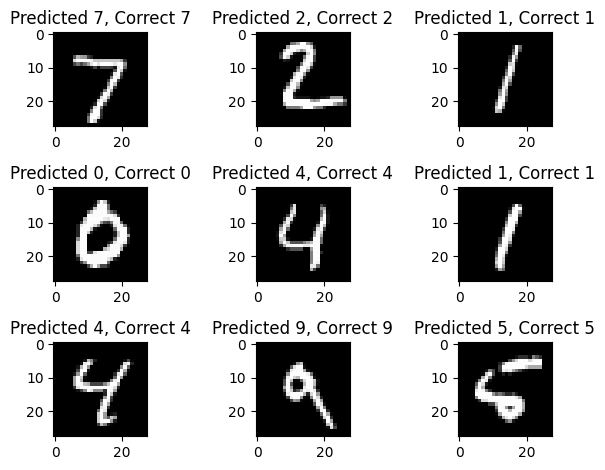

In [9]:
plt.figure()

for i in range(9) :
    plt.subplot(3, 3, i+1)
    correct= correct_indices[i]
    plt.imshow(X_test[correct].reshape(28, 28), cmap="gray")
    plt.title("Predicted {}, Correct {}".format(predicted_class[correct], y_test[correct]))

plt.tight_layout()

##### 8. 잘 예측되지 않는 데이터 살펴보기

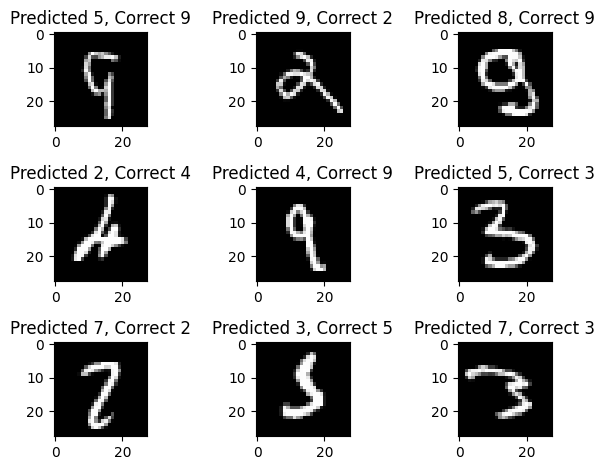

In [10]:
plt.figure()

for i in range(9) :
    plt.subplot(3, 3, i+1)
    correct= incorrect_indices[i]
    plt.imshow(X_test[correct].reshape(28, 28), cmap="gray")
    plt.title("Predicted {}, Correct {}".format(predicted_class[correct], y_test[correct]))

plt.tight_layout()

##### 9. test 사진

In [18]:
# test0.png, test1.png, test(2).png 등 'test'로 시작하는 .png 파일을 모두 삭제
!rm test*.png